<a href="https://colab.research.google.com/github/yudhead/Mesin-Learning/blob/main/Week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import math
import os
import glob
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

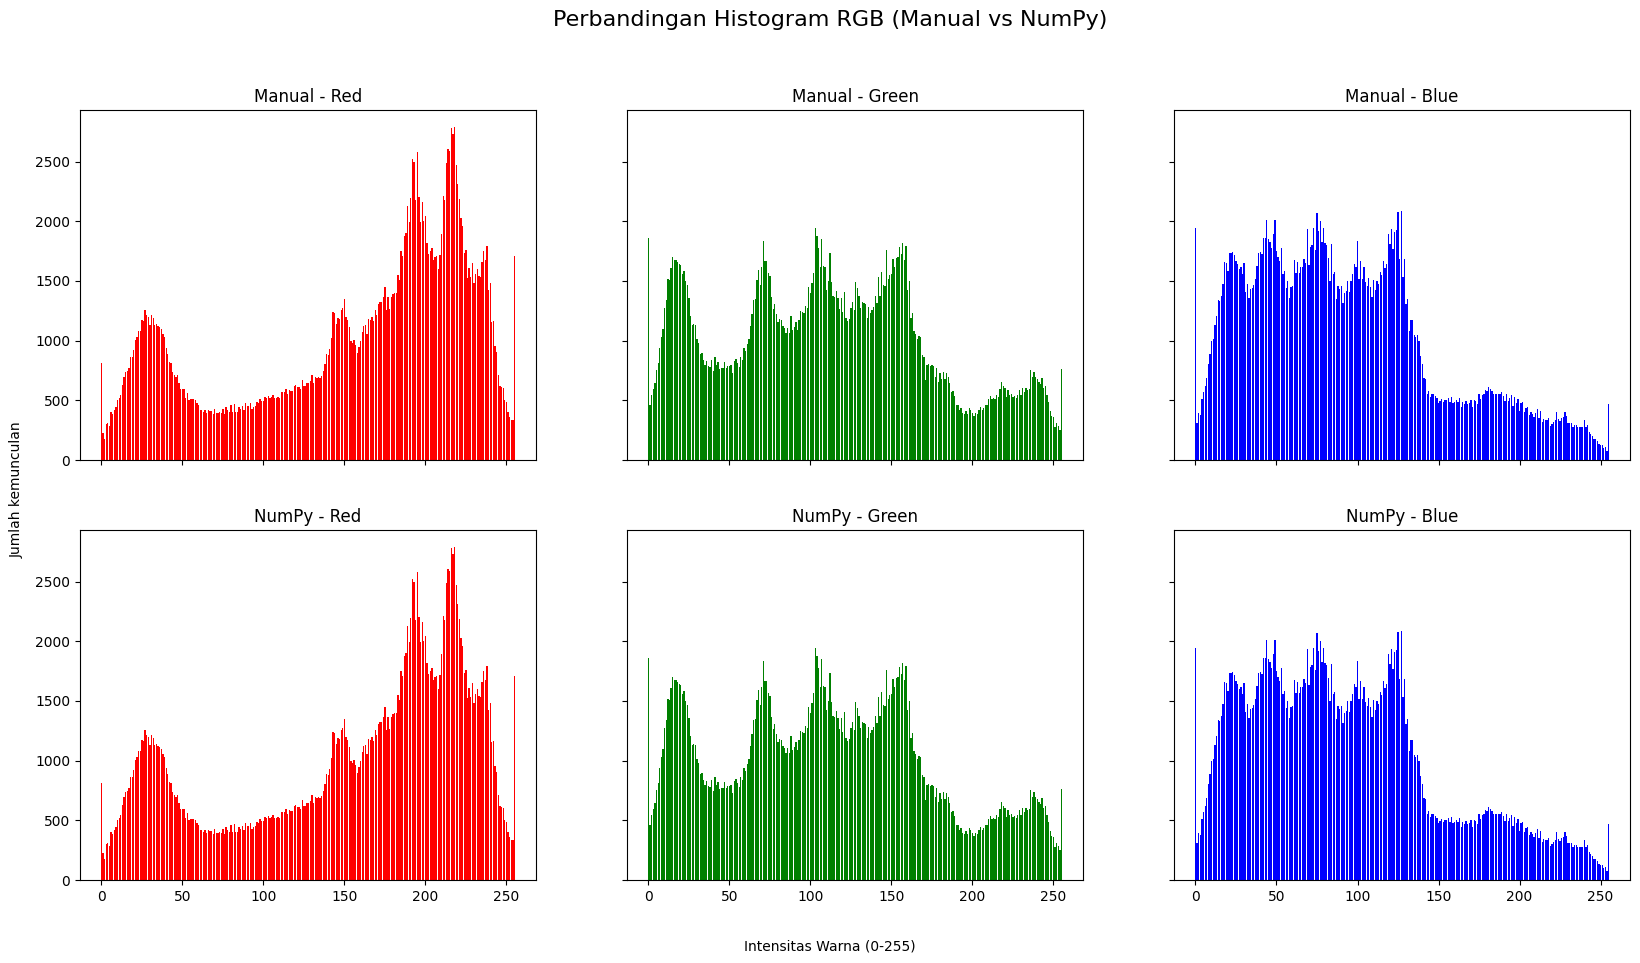

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar lena
img = cv.imread('/content/drive/MyDrive/PCVK/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

height, width, depth = np.shape(img)
names = np.arange(256)

# ----------------------------
# Cara 1: Histogram manual
# ----------------------------
red = np.zeros(256, dtype=int)
green = np.zeros(256, dtype=int)
blue = np.zeros(256, dtype=int)

for y in range(0, height):
    for x in range(0, width):
        red[img[y][x][0]] += 1
        green[img[y][x][1]] += 1
        blue[img[y][x][2]] += 1

# ----------------------------
# Cara 2: Histogram dengan NumPy
# ----------------------------
red_np, _ = np.histogram(img[:,:,0].ravel(), bins=256, range=[0,256])
green_np, _ = np.histogram(img[:,:,1].ravel(), bins=256, range=[0,256])
blue_np, _ = np.histogram(img[:,:,2].ravel(), bins=256, range=[0,256])

# ----------------------------
# Plot hasil perbandingan
# ----------------------------
fig, axs = plt.subplots(2, 3, figsize=(20,10), sharex=True, sharey=True)

fig.suptitle('Perbandingan Histogram RGB (Manual vs NumPy)', fontsize=16)
fig.text(0.09, 0.5, 'Jumlah kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna (0-255)', ha='center')

# Baris 1: Manual
axs[0,0].bar(names, red, color='red')
axs[0,0].set_title("Manual - Red")
axs[0,1].bar(names, green, color='green')
axs[0,1].set_title("Manual - Green")
axs[0,2].bar(names, blue, color='blue')
axs[0,2].set_title("Manual - Blue")

# Baris 2: NumPy
axs[1,0].bar(names, red_np, color='red')
axs[1,0].set_title("NumPy - Red")
axs[1,1].bar(names, green_np, color='green')
axs[1,1].set_title("NumPy - Green")
axs[1,2].bar(names, blue_np, color='blue')
axs[1,2].set_title("NumPy - Blue")

plt.show()


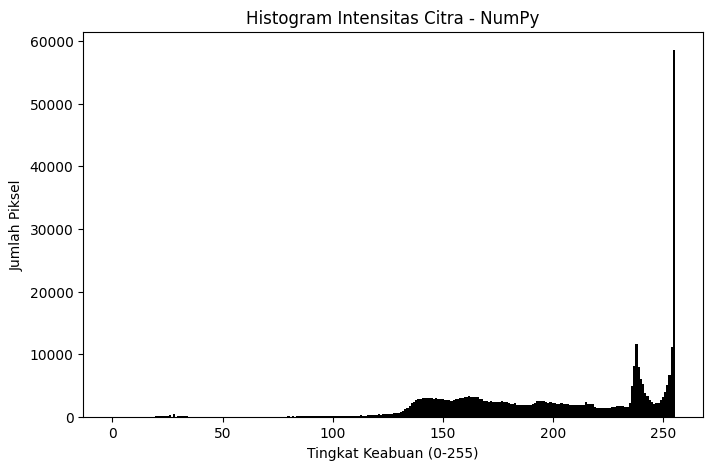

In [ ]:
img = cv.imread("/content/drive/MyDrive/PCVK/KTM lama.jpg", cv.IMREAD_GRAYSCALE)
hist_np, bins = np.histogram(img.ravel(), bins=256, range=[0, 256])
plt.figure(figsize=(8,5))
plt.bar(range(256), hist_np, width=1.0, color='black')
plt.title("Histogram Intensitas Citra - NumPy")
plt.xlabel("Tingkat Keabuan (0-255)")
plt.ylabel("Jumlah Piksel")
plt.show()


PSNR Lena (RGB asli vs equalized): 17.95 dB


/tmp/ipython-input-2312926347.py:36: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(r.ravel(), 256, [0,256], color='red', alpha=0.5, label='Red')
/tmp/ipython-input-2312926347.py:37: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(g.ravel(), 256, [0,256], color='green', alpha=0.5, label='Green')
/tmp/ipython-input-2312926347.py:38: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(b.ravel(), 256, [0,256], color='blue', alpha=0.5, label='Blue')
/tmp/ipython-input-2312926347.py:43: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter w

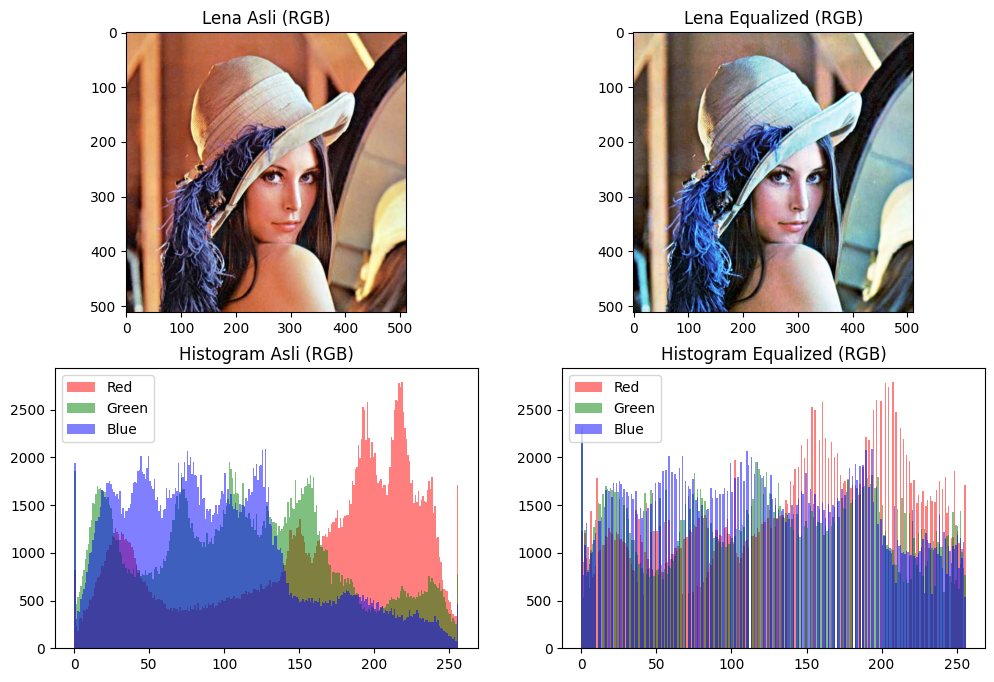

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar
lena = cv2.imread("/content/drive/MyDrive/PCVK/lena.jpg")
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)  # konversi BGR ke RGB

# Pisahkan channel RGB
r, g, b = cv2.split(lena)

# Histogram Equalization per channel
r_eq = cv2.equalizeHist(r)
g_eq = cv2.equalizeHist(g)
b_eq = cv2.equalizeHist(b)

# Gabungkan kembali
lena_eq = cv2.merge((r_eq, g_eq, b_eq))

# Hitung MSE dan PSNR
mse = np.mean((lena.astype(np.float32) - lena_eq.astype(np.float32)) ** 2)
if mse == 0:
    psnr = 100
else:
    psnr = 20 * np.log10(255.0 / np.sqrt(mse))

# Cetak PSNR dengan format rapi
print(f"PSNR Lena (RGB asli vs equalized): {psnr:.2f} dB")

# Plot gambar dan histogram
plt.figure(figsize=(12,8))
plt.subplot(2,2,1), plt.imshow(lena), plt.title("Lena Asli (RGB)")
plt.subplot(2,2,2), plt.imshow(lena_eq), plt.title("Lena Equalized (RGB)")

plt.subplot(2,2,3)
plt.hist(r.ravel(), 256, [0,256], color='red', alpha=0.5, label='Red')
plt.hist(g.ravel(), 256, [0,256], color='green', alpha=0.5, label='Green')
plt.hist(b.ravel(), 256, [0,256], color='blue', alpha=0.5, label='Blue')
plt.title("Histogram Asli (RGB)")
plt.legend()

plt.subplot(2,2,4)
plt.hist(r_eq.ravel(), 256, [0,256], color='red', alpha=0.5, label='Red')
plt.hist(g_eq.ravel(), 256, [0,256], color='green', alpha=0.5, label='Green')
plt.hist(b_eq.ravel(), 256, [0,256], color='blue', alpha=0.5, label='Blue')
plt.title("Histogram Equalized (RGB)")
plt.legend()

plt.show()


PSNR KTM (asli vs equalized): 9.91 dB


/tmp/ipython-input-3085339433.py:26: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(r.ravel(), 256, [0,256], color='red', alpha=0.5, label='Red')
/tmp/ipython-input-3085339433.py:27: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(g.ravel(), 256, [0,256], color='green', alpha=0.5, label='Green')
/tmp/ipython-input-3085339433.py:28: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(b.ravel(), 256, [0,256], color='blue', alpha=0.5, label='Blue')
/tmp/ipython-input-3085339433.py:33: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter w

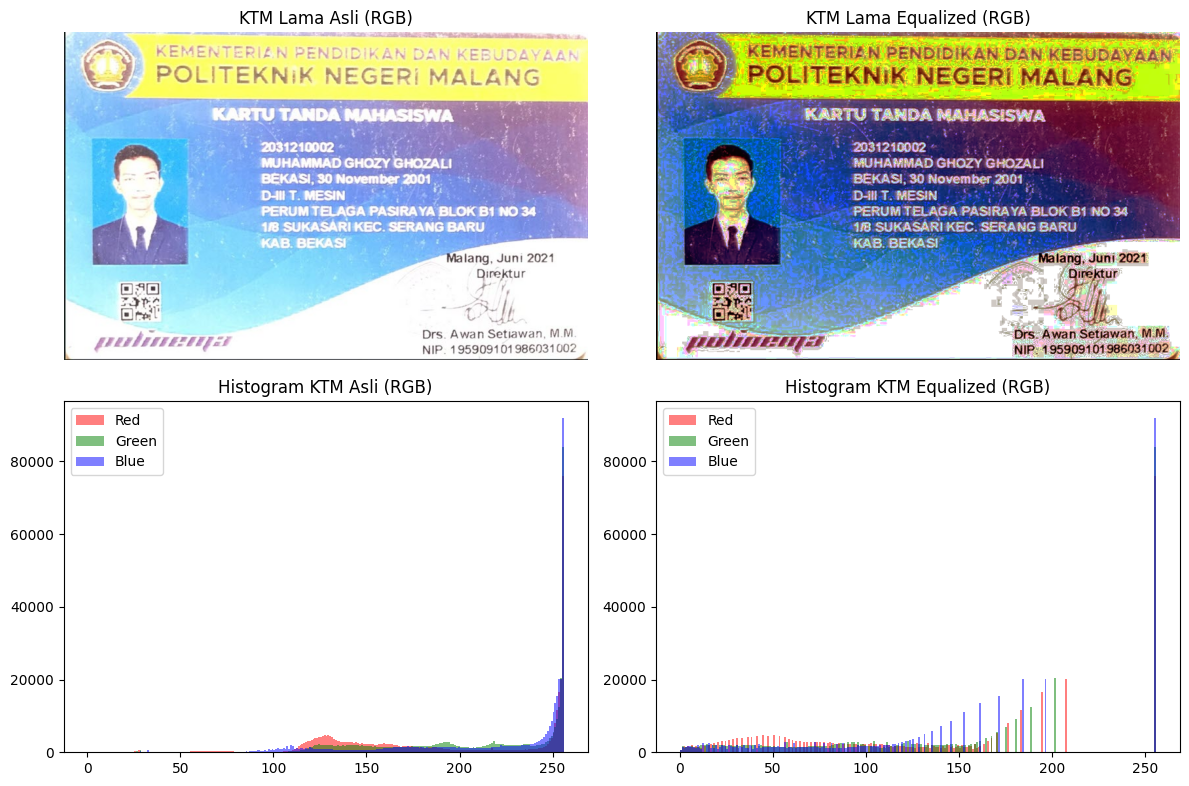

In [5]:
ktm = cv2.imread("/content/drive/MyDrive/PCVK/KTM lama.jpg")
ktm = cv2.cvtColor(ktm, cv2.COLOR_BGR2RGB)

r, g, b = cv2.split(ktm)

r_eq = cv2.equalizeHist(r)
g_eq = cv2.equalizeHist(g)
b_eq = cv2.equalizeHist(b)

ktm_eq = cv2.merge((r_eq, g_eq, b_eq))

mse = np.mean((ktm.astype(np.float32) - ktm_eq.astype(np.float32)) ** 2)
if mse == 0:
    psnr = 100
else:
    psnr = 20 * np.log10(255.0 / np.sqrt(mse))
print(f"PSNR KTM (asli vs equalized): {psnr:.2f} dB")

plt.figure(figsize=(12,8))
plt.subplot(2,2,1), plt.imshow(ktm), plt.title("KTM Lama Asli (RGB)")
plt.axis("off")
plt.subplot(2,2,2), plt.imshow(ktm_eq), plt.title("KTM Lama Equalized (RGB)")
plt.axis("off")

plt.subplot(2,2,3)
plt.hist(r.ravel(), 256, [0,256], color='red', alpha=0.5, label='Red')
plt.hist(g.ravel(), 256, [0,256], color='green', alpha=0.5, label='Green')
plt.hist(b.ravel(), 256, [0,256], color='blue', alpha=0.5, label='Blue')
plt.title("Histogram KTM Asli (RGB)")
plt.legend()

plt.subplot(2,2,4)
plt.hist(r_eq.ravel(), 256, [0,256], color='red', alpha=0.5, label='Red')
plt.hist(g_eq.ravel(), 256, [0,256], color='green', alpha=0.5, label='Green')
plt.hist(b_eq.ravel(), 256, [0,256], color='blue', alpha=0.5, label='Blue')
plt.title("Histogram KTM Equalized (RGB)")
plt.legend()

plt.tight_layout()
plt.show()


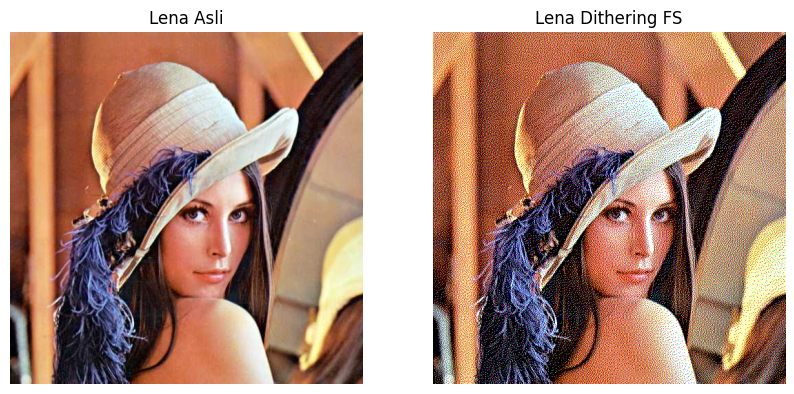

In [7]:
def threshold(value):
    return 255 if value > 127 else 0

def floyd_steinberg_dither(img):
    h, w, c = img.shape
    img = img.astype(float)

    for y in range(h):
        for x in range(w):
            old_pixel = img[y, x].copy()
            new_pixel = np.array([threshold(old_pixel[0]),
                                  threshold(old_pixel[1]),
                                  threshold(old_pixel[2])])
            img[y, x] = new_pixel
            error = old_pixel - new_pixel

            if x+1 < w:
                img[y, x+1] += error * 7/16
            if y+1 < h and x > 0:
                img[y+1, x-1] += error * 3/16
            if y+1 < h:
                img[y+1, x] += error * 5/16
            if y+1 < h and x+1 < w:
                img[y+1, x+1] += error * 1/16

    return np.clip(img, 0, 255).astype(np.uint8)

lena = cv2.imread("/content/drive/MyDrive/PCVK/lena.jpg")
lena_rgb = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)

lena_dither = floyd_steinberg_dither(lena_rgb)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(lena_rgb), plt.title("Lena Asli"), plt.axis("off")
plt.subplot(1,2,2), plt.imshow(lena_dither), plt.title("Lena Dithering FS"), plt.axis("off")
plt.show()


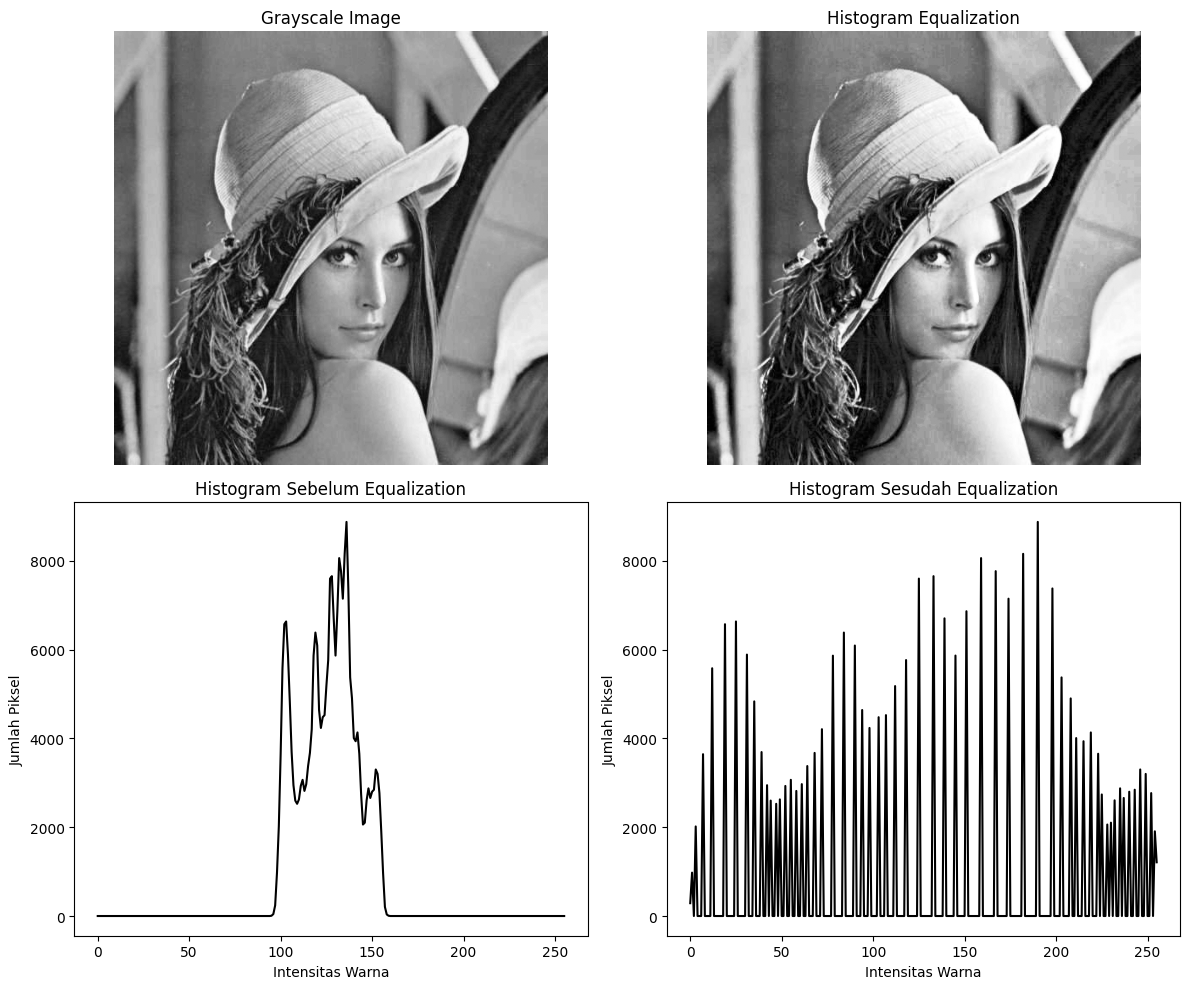

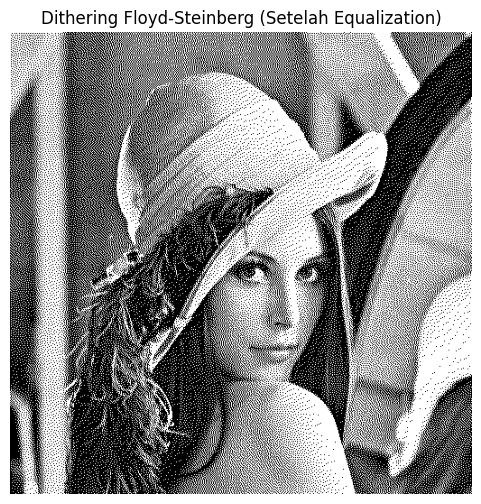

In [9]:
def threshold(value):
    return 255 if value > 127 else 0

def floyd_steinberg_dither_gray(img):
    h, w = img.shape
    img = img.astype(float)

    for y in range(h):
        for x in range(w):
            old_pixel = img[y, x]
            new_pixel = threshold(old_pixel)
            img[y, x] = new_pixel
            error = old_pixel - new_pixel

            if x+1 < w:
                img[y, x+1] += error * 7/16
            if y+1 < h and x > 0:
                img[y+1, x-1] += error * 3/16
            if y+1 < h:
                img[y+1, x] += error * 5/16
            if y+1 < h and x+1 < w:
                img[y+1, x+1] += error * 1/16

    return np.clip(img, 0, 255).astype(np.uint8)

lena_lc = cv2.imread("/content/drive/MyDrive/PCVK/lena_lc.jpg", cv2.IMREAD_GRAYSCALE)

hist_before, bins = np.histogram(lena_lc.flatten(), 256, [0,256])

lena_eq = cv2.equalizeHist(lena_lc)

hist_after, bins = np.histogram(lena_eq.flatten(), 256, [0,256])

lena_dither = floyd_steinberg_dither_gray(lena_eq)

plt.figure(figsize=(12,10))

plt.subplot(2,2,1), plt.imshow(lena_lc, cmap="gray")
plt.title("Grayscale Image"), plt.axis("off")

plt.subplot(2,2,2), plt.imshow(lena_eq, cmap="gray")
plt.title("Histogram Equalization"), plt.axis("off")

plt.subplot(2,2,3), plt.plot(hist_before, color='black')
plt.title("Histogram Sebelum Equalization")
plt.xlabel("Intensitas Warna"), plt.ylabel("Jumlah Piksel")

plt.subplot(2,2,4), plt.plot(hist_after, color='black')
plt.title("Histogram Sesudah Equalization")
plt.xlabel("Intensitas Warna"), plt.ylabel("Jumlah Piksel")

plt.tight_layout()
plt.show()

plt.figure(figsize=(6,6))
plt.imshow(lena_dither, cmap="gray")
plt.title("Dithering Floyd-Steinberg (Setelah Equalization)")
plt.axis("off")
plt.show()
